<a href="https://colab.research.google.com/github/sinkudo/fonts-recognition/blob/main/ker.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from zipfile import ZipFile
with ZipFile("imgs.zip", 'r') as zip:
  zip.extractall()
with ZipFile("testimgs.zip", 'r') as zip:
  zip.extractall()

In [5]:
# Model / data parameters
num_classes = 26
input_shape = (28, 28, 1)

b_size = 32
train_ds = tf.keras.utils.image_dataset_from_directory(
  'imgs/',
  validation_split=0.2,
  labels='inferred',
  label_mode='categorical',
  subset="training",
  seed=123,
  color_mode="grayscale",
  image_size=(28, 28),
  batch_size=b_size)
validation_ds = tf.keras.utils.image_dataset_from_directory(
  'imgs/',
  validation_split=0.2,
  labels='inferred',
  label_mode='categorical',
  subset="validation",
  seed=123,
  color_mode="grayscale",
  image_size=(28, 28),
  batch_size=b_size)

# print(train_ds)
# print(validation_ds)


Found 598 files belonging to 26 classes.
Using 479 files for training.
Found 598 files belonging to 26 classes.
Using 119 files for validation.


['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z']


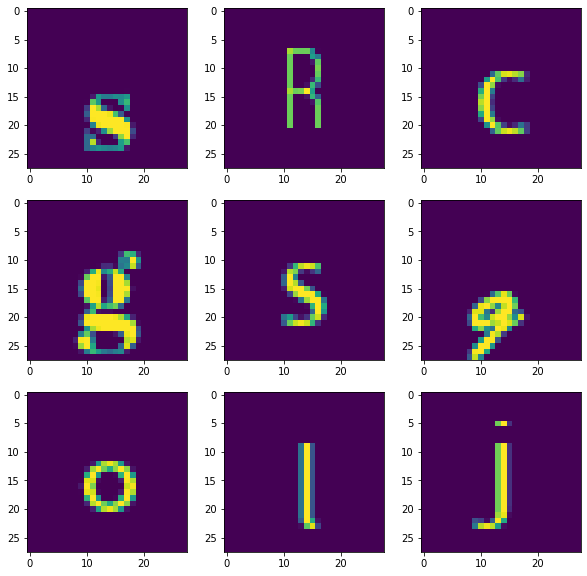

In [4]:
import matplotlib.pyplot as plt
class_names = train_ds.class_names
plt.figure(figsize=(10, 10))
print(class_names)
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i+1)
    plt.imshow(images[i].numpy().astype("uint8"))

In [6]:
model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation="softmax"),
    ]
)

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dropout (Dropout)           (None, 1600)              0

In [7]:
import numpy as np


batch_size = 104
epochs = 15

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])


model.fit(train_ds, validation_data=validation_ds, batch_size=batch_size, epochs=epochs)

Epoch 1/15
15/15 [==============================] - 3s 46ms/step - loss: 30.3641 - accuracy: 0.0543 - val_loss: 6.8062 - val_accuracy: 0.0756
Epoch 2/15
15/15 [==============================] - 1s 32ms/step - loss: 6.2533 - accuracy: 0.1399 - val_loss: 3.5330 - val_accuracy: 0.0924
Epoch 3/15
15/15 [==============================] - 1s 34ms/step - loss: 3.2629 - accuracy: 0.1754 - val_loss: 2.8963 - val_accuracy: 0.2017
Epoch 4/15
15/15 [==============================] - 1s 34ms/step - loss: 2.5931 - accuracy: 0.2839 - val_loss: 2.6958 - val_accuracy: 0.2185
Epoch 5/15
15/15 [==============================] - 1s 32ms/step - loss: 2.3945 - accuracy: 0.2923 - val_loss: 2.4367 - val_accuracy: 0.2941
Epoch 6/15
15/15 [==============================] - 1s 33ms/step - loss: 2.0352 - accuracy: 0.4092 - val_loss: 2.2684 - val_accuracy: 0.3697
Epoch 7/15
15/15 [==============================] - 1s 31ms/step - loss: 1.8176 - accuracy: 0.4405 - val_loss: 2.1589 - val_accuracy: 0.4034
Epoch 8/15
1

In [8]:
test_ds = tf.keras.utils.image_dataset_from_directory(
  'imgs/',
  labels='inferred',
  label_mode='categorical',
  seed=123,
  color_mode="grayscale",
  image_size=(28, 28),
  batch_size=b_size)
score = model.evaluate(test_ds, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Found 598 files belonging to 26 classes.
Test loss: 0.6487252712249756
Test accuracy: 0.832775890827179
